In [15]:
from __future__ import print_function, division
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sklearn
import seaborn as sns
import json
from pandas.io.json import json_normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline

In [16]:
X_train = pd.read_csv('train_dataset.csv', sep = '\t', index_col = 0).drop('cuisine', axis = 1)
cuisines = pd.read_csv('train_dataset.csv', sep = '\t', usecols = ['cuisine'])
cuisines.set_index(X_train.index, inplace = True)

# tSNE

In [17]:
tsne = TSNE(n_components = 2, perplexity = 15, early_exaggeration = 30)
X_tsne = tsne.fit_transform(X_train.iloc[:, :-2])

In [11]:
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'navy', 'turquoise', 'darkorange', 'black', 'coral', 'fuchsia', 'lightblue', 'grey', 'lavender', 'plum', 'tan', 'teal', 'violet', 'salmon', 'darkgreen']

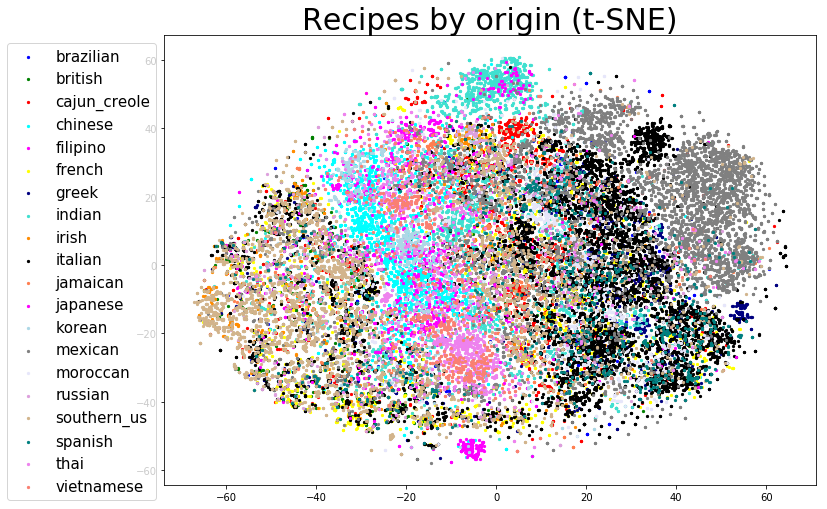

In [41]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

plt.title("Recipes by origin (t-SNE)", fontsize=30)
for i, cur_origin in enumerate(np.unique(cuisines)):
    plt.scatter(X_tsne[(cuisines == cur_origin)['cuisine'], 0], X_tsne[(cuisines == cur_origin)['cuisine'], 1], 
                c = colors[i], label = cur_origin, s = 5)

plt.legend(bbox_to_anchor = (0.0, 1.0), prop={'size': 15})
plt.savefig("results/t-sne_plot.png", bbox_inches='tight')
plt.show()

In [ ]:
pca = PCA(n_components = 5)
X_pca = pca.fit_transform(X_train.iloc[:, :-2])

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

plt.title("Recipes by origin (PCA)")
for i, cur_origin in enumerate(np.unique(cuisines)):
    plt.scatter(X_pca[(cuisines == cur_origin)['cuisine'], 1], X_pca[(cuisines == cur_origin)['cuisine'], 2], 
                c = colors[i], label = cur_origin, s = 5)
plt.savefig("pca.png")